In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

In [12]:
data=pd.read_csv('D:/data_reduce_filled.csv')

In [13]:
economics = [
    'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]',
    'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]',
    'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]',
    'Final consumption expenditure (current US$) [NE.CON.TOTL.CD]',
    'GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]',
    'Population, total [SP.POP.TOTL]',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]'
]

In [14]:
pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

In [15]:
x = data[economics]

In [16]:
y = data[pollution]

In [25]:
y.rename(columns={
    
    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]' : 're_energy_con',
    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]' : 'CO2_PPP',
    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]' : 'access_elec',
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]' : 'access_clean_fuel',
    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]' : 'greenhouse',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]' : 'energy_intensity',
    'Carbon intensity of electricity (gCO2/kWh)' : 'carbon_intensity'
    
    
}, inplace=True)
    

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .2, random_state=0)

x_train=StandardScaler().fit_transform(x_train)

x_test=StandardScaler().fit_transform(x_test)


In [34]:
#GLM
#Ridge for the first bivariate
y_train_1=y_train[['access_clean_fuel','access_elec']]
y_test_1=y_test[['access_clean_fuel','access_elec']]


In [35]:
ridge=Ridge()
parameters1= {'alpha':[x for x in range(1,101)]}
ridge_reg1=ms.GridSearchCV(ridge, param_grid=parameters1,return_train_score=True, scoring='neg_mean_squared_error', cv=5)
ridge_reg1.fit(x_train,y_train_1)
print("The best value of Alpha is: ",ridge_reg1.best_params_)

The best value of Alpha is:  {'alpha': 6}


In [36]:
ridge_mod1=Ridge(alpha=6)
ridge_mod1.fit(x_train,y_train_1)
y_pred_train1=ridge_mod1.predict(x_train)
y_pred_test1=ridge_mod1.predict(x_test)


print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test1))))


Root Mean Square Error train = 17.249043459344783
Root Mean Square Error test = 21.675901082619433


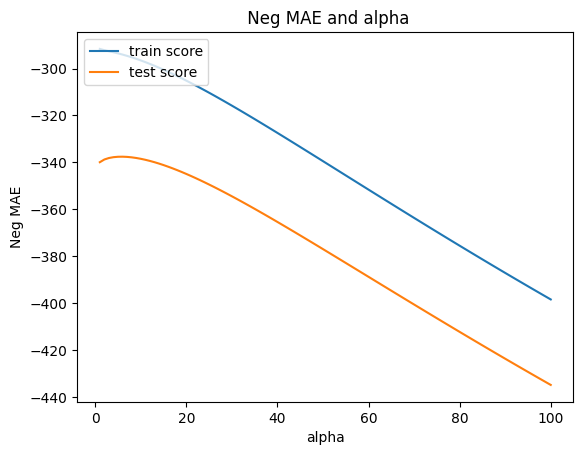

In [37]:
cv_result1 = pd.DataFrame(ridge_reg1.cv_results_)
cv_result1 = cv_result1[cv_result1['param_alpha']<=100]

cv_result1['param_alpha'] = cv_result1['param_alpha'].astype('int32')

plt.plot(cv_result1['param_alpha'], cv_result1['mean_train_score'])
plt.plot(cv_result1['param_alpha'], cv_result1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [38]:
#Ridge for the second bivariate
y_train_2=y_train[['CO2_PPP','greenhouse']]
y_test_2=y_test[['CO2_PPP','greenhouse']]

In [39]:
parameters2= {'alpha':[x for x in range(1,101)]}
ridge_reg2=ms.GridSearchCV(ridge, param_grid=parameters2,return_train_score=True, scoring='neg_mean_squared_error', cv=5)
ridge_reg2.fit(x_train,y_train_2)
print("The best value of Alpha is: ",ridge_reg2.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [40]:
ridge_mod2=Ridge(alpha=1)
ridge_mod2.fit(x_train,y_train_2)
y_pred_train2=ridge_mod2.predict(x_train)
y_pred_test2=ridge_mod2.predict(x_test)


print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_2, y_pred_train2))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test2))))


Root Mean Square Error train = 170258.4836568043
Root Mean Square Error test = 101863.20075961568


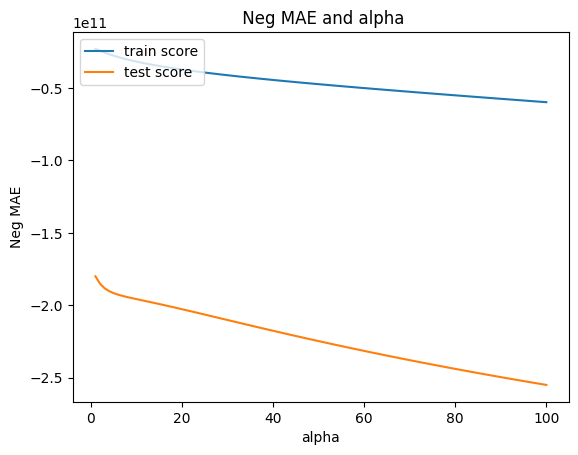

In [43]:
cv_result2 = pd.DataFrame(ridge_reg2.cv_results_)
cv_result2 = cv_result2[cv_result2['param_alpha']<=100]

cv_result2['param_alpha'] = cv_result2['param_alpha'].astype('int32')

plt.plot(cv_result2['param_alpha'], cv_result2['mean_train_score'])
plt.plot(cv_result2['param_alpha'], cv_result2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
#Ridge for the third bivariate
y_train_3=y_train[['energy_intensity','carbon_intensity']]
y_test_3=y_test[['energy_intensity','carbon_intensity']]

In [45]:
parameters3= {'alpha':[x for x in range(1,101)]}
ridge_reg3=ms.GridSearchCV(ridge, param_grid=parameters3,return_train_score=True, scoring='neg_mean_squared_error', cv=5)
ridge_reg3.fit(x_train,y_train_3)
print("The best value of Alpha is: ",ridge_reg3.best_params_)

The best value of Alpha is:  {'alpha': 32}


In [46]:
ridge_mod3=Ridge(alpha=1)
ridge_mod3.fit(x_train,y_train_3)
y_pred_train3=ridge_mod3.predict(x_train)
y_pred_test3=ridge_mod3.predict(x_test)


print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_2, y_pred_train3))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test3))))


Root Mean Square Error train = 754228.7921238792
Root Mean Square Error test = 703822.5603960777


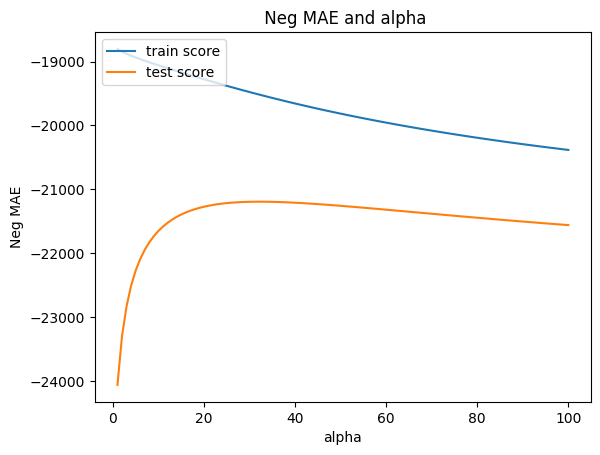

In [47]:
cv_result3 = pd.DataFrame(ridge_reg3.cv_results_)
cv_result3 = cv_result3[cv_result3['param_alpha']<=100]

cv_result3['param_alpha'] = cv_result3['param_alpha'].astype('int32')

plt.plot(cv_result3['param_alpha'], cv_result3['mean_train_score'])
plt.plot(cv_result3['param_alpha'], cv_result3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [48]:
#lasso for the first bivariate
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

In [50]:
lasso=Lasso()
lasso_reg1=ms.GridSearchCV(lasso, param_grid=parameters,return_train_score=True,scoring='neg_mean_squared_error', cv=5)
lasso_reg1.fit(x_train,y_train_1)
print('The best value of Alpha is: ',lasso_reg1.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [52]:
lasso_mod1=Lasso(alpha=1)
lasso_mod1.fit(x_train,y_train_1)
y_lasso_train1=lasso_mod1.predict(x_train)
y_lasso_test1=lasso_mod1.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_1, y_lasso_train1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_1, y_lasso_test1))))


Root Mean Square Error train = 17.46165870558528
Root Mean Square Error test = 21.090590535353066


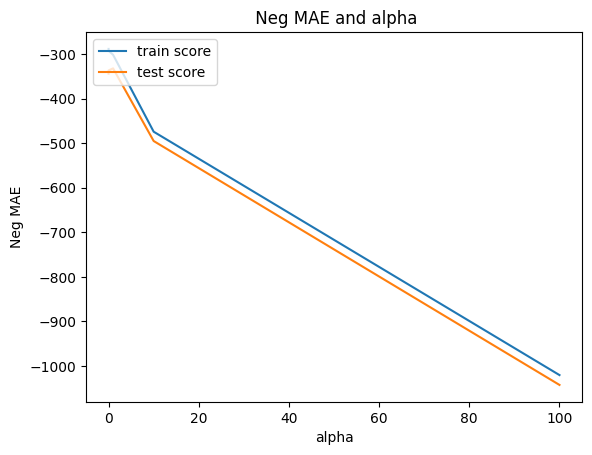

In [53]:
cv_result_lasso1 = pd.DataFrame(lasso_reg1.cv_results_)
cv_result_lasso1 = cv_result_lasso1[cv_result_lasso1['param_alpha']<=100]

cv_result_lasso1['param_alpha'] = cv_result_lasso1['param_alpha'].astype('int32')

plt.plot(cv_result_lasso1['param_alpha'], cv_result_lasso1['mean_train_score'])
plt.plot(cv_result_lasso1['param_alpha'], cv_result_lasso1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
coef1 = lasso_mod1.coef_
coefs1 = pd.Series(coef1[1], index = x.columns)
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  5 important features and dropped the other  6  features


In [59]:
coefs1 = pd.Series(coef1[0], index = x.columns)
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  5 important features and dropped the other  6  features


In [60]:
#lasso for the second bivariate
lasso_reg2=ms.GridSearchCV(lasso, param_grid=parameters,return_train_score=True,scoring='neg_mean_squared_error', cv=5)
lasso_reg2.fit(x_train,y_train_2)
print('The best value of Alpha is: ',lasso_reg2.best_params_)

The best value of Alpha is:  {'alpha': 100}


In [61]:
lasso_mod2=Lasso(alpha=100)
lasso_mod2.fit(x_train,y_train_2)
y_lasso_train2=lasso_mod2.predict(x_train)
y_lasso_test2=lasso_mod2.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_2, y_lasso_train2))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_2, y_lasso_test2))))


Root Mean Square Error train = 166124.76402970374
Root Mean Square Error test = 110659.33973992617


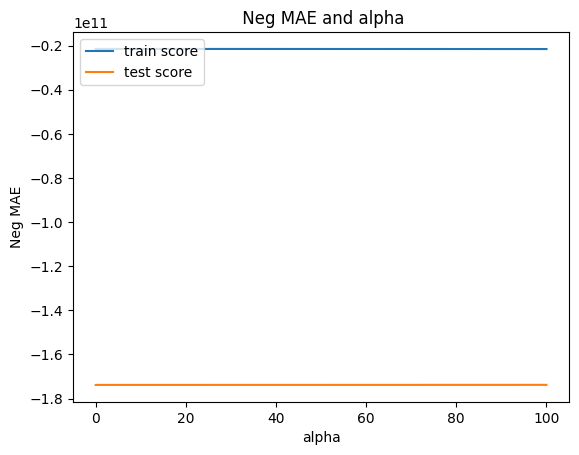

In [62]:
cv_result_lasso2 = pd.DataFrame(lasso_reg2.cv_results_)
cv_result_lasso2 = cv_result_lasso2[cv_result_lasso2['param_alpha']<=100]

cv_result_lasso2['param_alpha'] = cv_result_lasso2['param_alpha'].astype('int32')

plt.plot(cv_result_lasso2['param_alpha'], cv_result_lasso2['mean_train_score'])
plt.plot(cv_result_lasso2['param_alpha'], cv_result_lasso2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
coef2 = lasso_mod2.coef_
coefs2 = pd.Series(coef2[1], index = x.columns)
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  5 important features and dropped the other  6  features


In [73]:
coef2 = lasso_mod2.coef_
coefs2 = pd.Series(coef2[0], index = x.columns)
print("Lasso kept ",sum(coefs2 != 0), "important features and dropped the other ", sum(coefs2 == 0)," features")


Lasso kept  0 important features and dropped the other  11  features


In [69]:
#lasso for the third bivariate
lasso_reg3=ms.GridSearchCV(lasso, param_grid=parameters,return_train_score=True,scoring='neg_mean_squared_error', cv=5)
lasso_reg3.fit(x_train,y_train_3)
print('The best value of Alpha is: ',lasso_reg3.best_params_)

The best value of Alpha is:  {'alpha': 10}


In [70]:
lasso_mod3=Lasso(alpha=10)
lasso_mod3.fit(x_train,y_train_3)
y_lasso_train3=lasso_mod3.predict(x_train)
y_lasso_test3=lasso_mod3.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train_3, y_lasso_train3))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test_3, y_lasso_test3))))


Root Mean Square Error train = 141.1449514131653
Root Mean Square Error test = 154.40590527265235


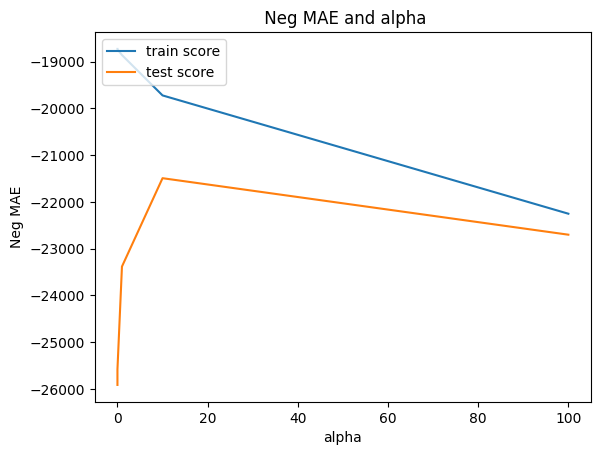

In [71]:
cv_result_lasso3 = pd.DataFrame(lasso_reg3.cv_results_)
cv_result_lasso3 = cv_result_lasso3[cv_result_lasso3['param_alpha']<=100]

cv_result_lasso3['param_alpha'] = cv_result_lasso3['param_alpha'].astype('int32')

plt.plot(cv_result_lasso3['param_alpha'], cv_result_lasso3['mean_train_score'])
plt.plot(cv_result_lasso3['param_alpha'], cv_result_lasso3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [72]:
coef3 = lasso_mod3.coef_
coefs3 = pd.Series(coef2[1], index = x.columns)
print("Lasso kept ",sum(coefs3 != 0), "important features and dropped the other ", sum(coefs3 == 0)," features")


Lasso kept  11 important features and dropped the other  0  features


In [74]:
coef3 = lasso_mod3.coef_
coefs3 = pd.Series(coef2[0], index = x.columns)
print("Lasso kept ",sum(coefs3 != 0), "important features and dropped the other ", sum(coefs3 == 0)," features")


Lasso kept  0 important features and dropped the other  11  features


In [75]:
#ridge for all the 6 polllution variables
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}
ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters,return_train_score=True, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [77]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))


Root Mean Square Error train = 63825.650393469434
Root Mean Square Error test = 38673.547045202555


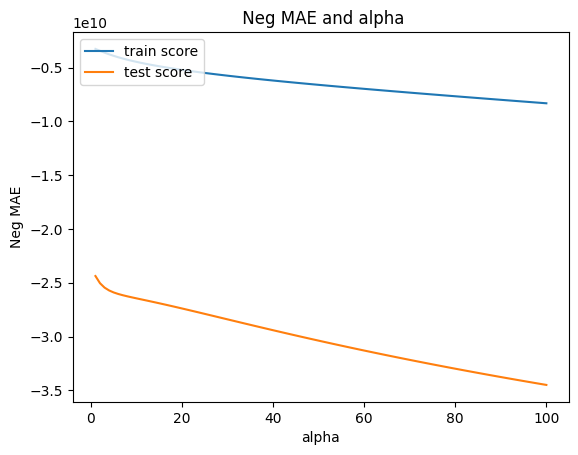

In [78]:
cv_result = pd.DataFrame(ridge_reg.cv_results_)
cv_result = cv_result[cv_result['param_alpha']<=100]

cv_result['param_alpha'] = cv_result['param_alpha'].astype('int32')

plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [79]:
#lasso
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters,return_train_score=True,scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)


The best value of Alpha is:  {'alpha': 100}


In [80]:
lasso_mod=Lasso(alpha=100)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_lasso_test))))


Root Mean Square Error train = 62257.646244397
Root Mean Square Error test = 42084.125842163405


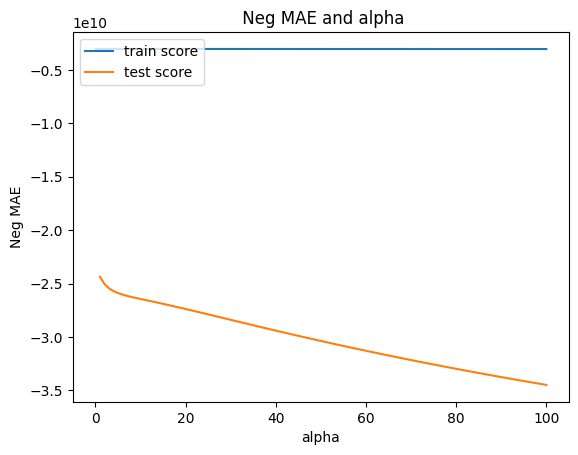

In [81]:
cv_result2 = pd.DataFrame(lasso_reg.cv_results_)
cv_result2 = cv_result2[cv_result2['param_alpha']<=100]

cv_result2['param_alpha'] = cv_result2['param_alpha'].astype('int32')

plt.plot(cv_result2['param_alpha'], cv_result2['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MAE')
plt.title(" Neg MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [82]:
coef = lasso_mod.coef_

coefs = pd.Series(coef[1], index = x.columns)

print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  0 important features and dropped the other  11  features
